### Import libraries

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets, transforms
import torch.nn.functional as F
from sklearn.decomposition import PCA
import sympy as sp
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset, Subset
from torchsummary import summary

## 1-1 Deep vs Shallow


### 1. Simulating a Non-Linear Function (Single-input, Single-output feature, Non-linear)

Step 1:  a Non-Linear Function

In [54]:
x = np.linspace(-10, 10, 1000)
y = np.sin(x)

x = np.reshape(x, (-1, 1))  
y = np.reshape(y, (-1, 1))  


# Convert to PyTorch tensors
x_tensor = torch.from_numpy(x).float()
y_tensor = torch.from_numpy(y).float()

Step 2: Build DNN Models

In [55]:
# Model 1: Shallow Model (1 hidden layer)
class ShallowModel(nn.Module):
    def __init__(self):
        super(ShallowModel, self).__init__()
        self.fc1 = nn.Linear(1, 169)
        self.fc2 = nn.Linear(169, 1)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Model 2: Deep Model (2 hidden layers)
class DeepModel2(nn.Module):
    def __init__(self):
        super(DeepModel2, self).__init__()
        self.fc1 = nn.Linear(1, 15)
        self.fc2 = nn.Linear(15, 28)
        self.fc3 = nn.Linear(28, 1)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Model 3: Deep Model (3 hidden layers)
class DeepModel3(nn.Module):
    def __init__(self):
        super(DeepModel3, self).__init__()
        self.fc1 = nn.Linear(1, 15)
        self.fc2 = nn.Linear(15, 15)
        self.fc3 = nn.Linear(15, 14)
        self.fc4 = nn.Linear(14, 1)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [56]:
# Print summaries
input_length = 1  # Input length for each model

print("ShallowNN:")
summary(ShallowModel(), (1, input_length))

print("\nDeepNN:")
summary(DeepModel2(), (1, input_length))

print("\nDeepNNWithDropout:")
summary(DeepModel3(), (1, input_length))

ShallowNN:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 169]             338
            Linear-2                 [-1, 1, 1]             170
Total params: 508
Trainable params: 508
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------

DeepNN:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 15]              30
            Linear-2                [-1, 1, 28]             448
            Linear-3                 [-1, 1, 1]              29
Total params: 507
Trainable params: 507
Non-trainable params: 0
-----------------------------

Step 3: Training Function

In [60]:
def train_model(model, x, y, epochs=1000, lr=0.01):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    loss_history = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(x)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        
        loss_history.append(loss.item())
    
    return loss_history

Step 4: Train All Models

In [61]:
# Initialize models
model_shallow = ShallowModel()
model_deep2 = DeepModel2()
model_deep3 = DeepModel3()

# Train models
epochs = 100
loss_shallow = train_model(model_shallow, x_tensor, y_tensor, epochs)
loss_deep2 = train_model(model_deep2, x_tensor, y_tensor, epochs)
loss_deep3 = train_model(model_deep3, x_tensor, y_tensor, epochs)

Step 5: Plot Loss Curves

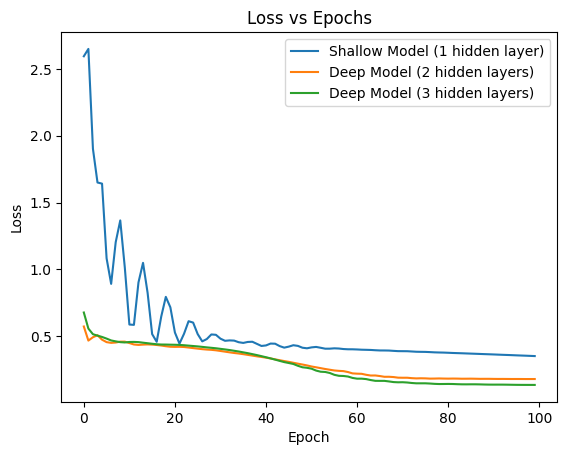

In [20]:
plt.plot(loss_shallow, label="Shallow Model (1 hidden layer)")
plt.plot(loss_deep2, label="Deep Model (2 hidden layers)")
plt.plot(loss_deep3, label="Deep Model (3 hidden layers)")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()

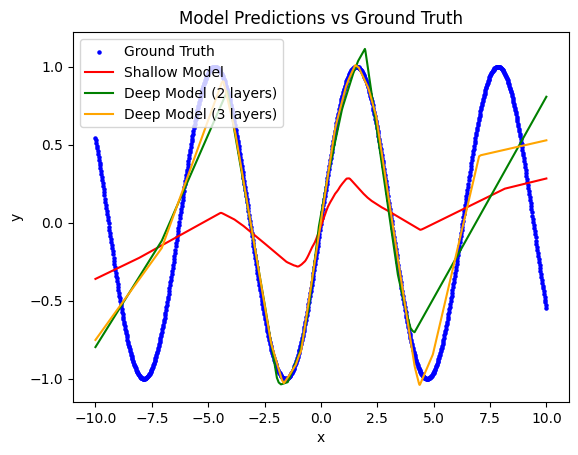

In [62]:
# Predictions
y_pred_shallow = model_shallow(x_tensor).detach().numpy()
y_pred_deep2 = model_deep2(x_tensor).detach().numpy()
y_pred_deep3 = model_deep3(x_tensor).detach().numpy()

# Plot predictions vs ground truth
plt.scatter(x, y, label="Ground Truth", color="blue", s=5)
plt.plot(x, y_pred_shallow, label="Shallow Model", color="red")
plt.plot(x, y_pred_deep2, label="Deep Model (2 layers)", color="green")
plt.plot(x, y_pred_deep3, label="Deep Model (3 layers)", color="orange")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Model Predictions vs Ground Truth')
plt.legend()
plt.show()

### 2.Train on actual task using shallow and deep models

Load and Preprocess MNIST

In [22]:
# Define transformations for MNIST (normalization)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

 Define CNN Models

1.Shallow CNN Model

In [23]:
class ShallowCNN(nn.Module):
    def __init__(self):
        super(ShallowCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16 * 12 * 12, 10) 
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, 16 * 12 * 12) 
        x = self.fc1(x)
        return x

2.Deep CNN Model (2 Conv Layers)

In [24]:
class DeepCNN2(nn.Module):
    def __init__(self):
        super(DeepCNN2, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

3.Deep CNN Model (3 Conv Layers)

In [25]:
class DeepCNN3(nn.Module):
    def __init__(self):
        super(DeepCNN3, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 1 * 1, 256)
        self.fc2 = nn.Linear(256, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 1 * 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

Training Function

In [26]:
def train_model(model, train_loader, epochs=10, lr=0.001):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    loss_history = []
    accuracy_history = []
    
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        
        for images, labels in train_loader:
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            # Loss
            running_loss += loss.item()
            
            # Accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        # Record loss and accuracy for this epoch
        epoch_loss = running_loss / len(train_loader)
        epoch_accuracy = 100 * correct / total
        loss_history.append(epoch_loss)
        accuracy_history.append(epoch_accuracy)
        
        print(f'Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%')
    
    return loss_history, accuracy_history

Train All Models

In [27]:
shallow_model = ShallowCNN()
deep_model2 = DeepCNN2()
deep_model3 = DeepCNN3()

# Train models
epochs = 15
loss_shallow, acc_shallow = train_model(shallow_model, train_loader, epochs)
loss_deep2, acc_deep2 = train_model(deep_model2, train_loader, epochs)
loss_deep3, acc_deep3 = train_model(deep_model3, train_loader, epochs)

Epoch 1, Loss: 0.1991, Accuracy: 94.34%
Epoch 2, Loss: 0.0697, Accuracy: 97.91%
Epoch 3, Loss: 0.0542, Accuracy: 98.33%
Epoch 4, Loss: 0.0463, Accuracy: 98.59%
Epoch 5, Loss: 0.0391, Accuracy: 98.78%
Epoch 6, Loss: 0.0353, Accuracy: 98.92%
Epoch 7, Loss: 0.0313, Accuracy: 99.02%
Epoch 8, Loss: 0.0276, Accuracy: 99.12%
Epoch 9, Loss: 0.0252, Accuracy: 99.21%
Epoch 10, Loss: 0.0221, Accuracy: 99.29%
Epoch 11, Loss: 0.0204, Accuracy: 99.33%
Epoch 12, Loss: 0.0183, Accuracy: 99.43%
Epoch 13, Loss: 0.0158, Accuracy: 99.50%
Epoch 14, Loss: 0.0155, Accuracy: 99.52%
Epoch 15, Loss: 0.0129, Accuracy: 99.58%
Epoch 1, Loss: 0.1510, Accuracy: 95.47%
Epoch 2, Loss: 0.0440, Accuracy: 98.68%
Epoch 3, Loss: 0.0306, Accuracy: 99.06%
Epoch 4, Loss: 0.0230, Accuracy: 99.28%
Epoch 5, Loss: 0.0171, Accuracy: 99.41%
Epoch 6, Loss: 0.0143, Accuracy: 99.51%
Epoch 7, Loss: 0.0112, Accuracy: 99.63%
Epoch 8, Loss: 0.0084, Accuracy: 99.73%
Epoch 9, Loss: 0.0080, Accuracy: 99.72%
Epoch 10, Loss: 0.0075, Accuracy: 

Plot Loss and Accuracy

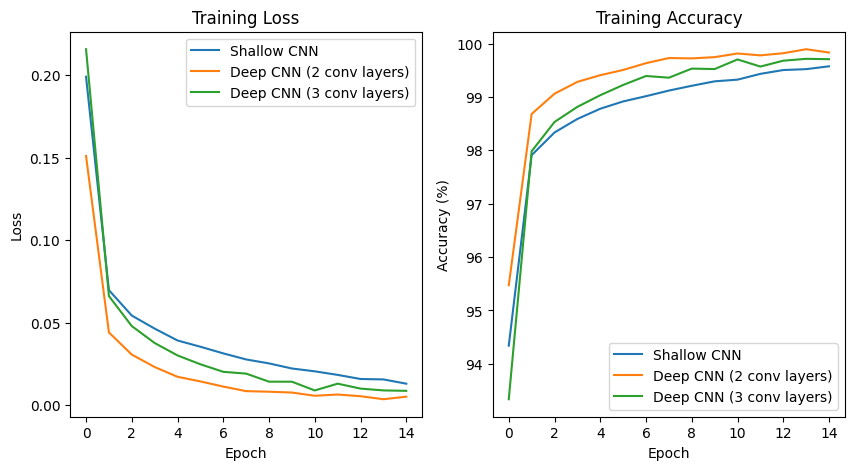

In [29]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(loss_shallow, label="Shallow CNN")
plt.plot(loss_deep2, label="Deep CNN (2 conv layers)")
plt.plot(loss_deep3, label="Deep CNN (3 conv layers)")
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(acc_shallow, label="Shallow CNN")
plt.plot(acc_deep2, label="Deep CNN (2 conv layers)")
plt.plot(acc_deep3, label="Deep CNN (3 conv layers)")
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()

# HW1-2: Optimization

## Visualize the optimization process

Epoch number 1/8
Epoch number 2/8
Epoch number 3/8
Epoch number 4/8
Epoch number 5/8
Epoch number 6/8
Epoch number 7/8
Epoch number 8/8


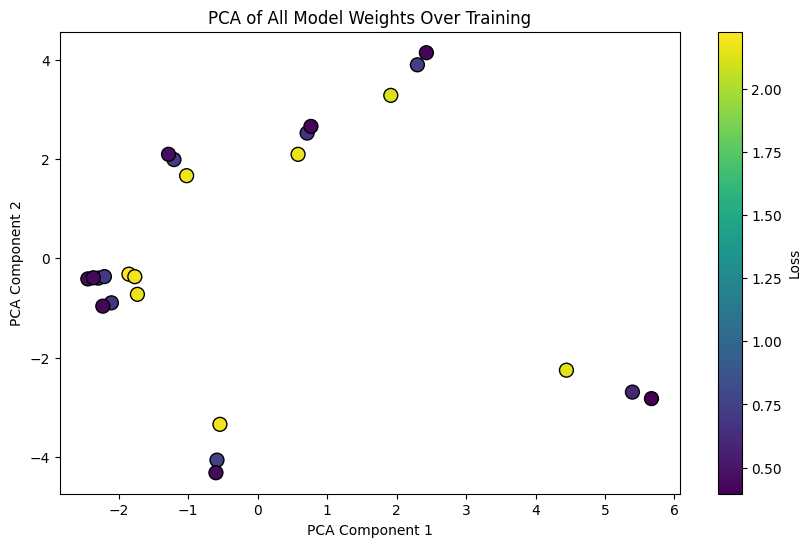

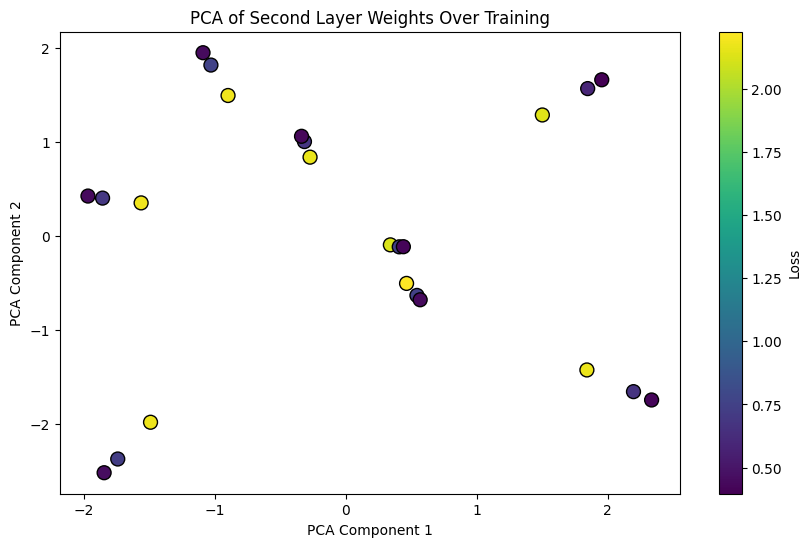

In [65]:
# Define a neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(784, 64)  # Reduced size
        self.fc2 = nn.Linear(64, 32)   # Second layer
        self.fc3 = nn.Linear(32, 10)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Function to train the model and collect data
def train_model_and_collect_data(model, train_loader, optimizer, criterion, num_epochs=8, collect_every=3):
    model.train()
    collected_weights_all = []

    collected_weights_fc2 = []
    collected_losses = []

    for epoch in range(num_epochs):
        running_loss = 0.0

        for inputs, labels in train_loader:
            inputs = inputs.view(inputs.shape[0], -1)  # Flatten the input
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Collect weights and losses every 3 epochs
        if epoch % collect_every == 0:
            # Collect all weights
            weight_snapshot_all = []
            for param in model.parameters():
                weight_snapshot_all.append(param.detach().cpu().numpy().flatten())
            collected_weights_all.append(np.concatenate(weight_snapshot_all))
                        
            
            # Collect only the second layer's (fc2) weights
            fc2_params = model.fc2.weight.detach().cpu().numpy().flatten()
            collected_weights_fc2.append(fc2_params)

            avg_loss = running_loss / len(train_loader)
            collected_losses.append(avg_loss)
    
    return collected_weights_all, collected_weights_fc2, collected_losses
    print (collected_weights_all)

# Reduce dimensionality using PCA
def visualize_weights_pca(weights_list, losses, title="PCA of Weights"):
    # Convert weights to 2D using PCA
    pca = PCA(n_components=2)
    weights_2d = pca.fit_transform(weights_list)

    # Plot the optimization process
    plt.figure(figsize=(10, 6))
    plt.scatter(weights_2d[:, 0], weights_2d[:, 1], c=losses, cmap='viridis', s=100, edgecolor='k')
    plt.colorbar(label="Loss")
    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()

# Main function to run the experiment
def main():
    # Hyperparameters
    batch_size = 32
    learning_rate = 0.01
    num_epochs = 8  

    # Load the MNIST dataset
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    

    train_subset = torch.utils.data.Subset(train_dataset, range(5000))
    train_loader = torch.utils.data.DataLoader(dataset=train_subset, batch_size=batch_size, shuffle=True)

    # Train the model and collect data
    all_collected_weights = []
    all_collected_weights_fc2 = []
    all_losses = []

    for i in range(8):  # Train for 8 times
        model = SimpleNN()
        optimizer = optim.SGD(model.parameters(), lr=learning_rate)
        criterion = nn.CrossEntropyLoss()

        print(f"Epoch number {i + 1}/8")
        collected_weights_all, collected_weights_fc2, losses = train_model_and_collect_data(model, train_loader, optimizer, criterion, num_epochs)

        all_collected_weights.extend(collected_weights_all)
        all_collected_weights_fc2.extend(collected_weights_fc2)
        all_losses.extend(losses)

    # Visualize the whole model's weights with PCA
    visualize_weights_pca(np.array(all_collected_weights), all_losses, title="PCA of All Model Weights Over Training")

    # Visualize the second layer's (fc2) weights with PCA
    visualize_weights_pca(np.array(all_collected_weights_fc2), all_losses, title="PCA of Second Layer Weights Over Training")

if __name__ == "__main__":
    main()

## Observe gradient norm during training

 MNIST Dataset

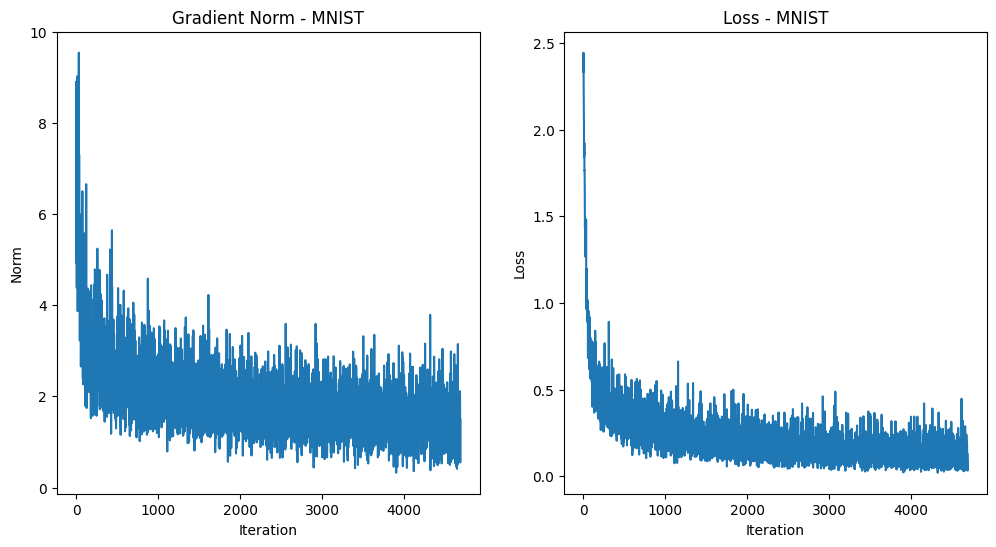

In [36]:
# Define a CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(32 * 14 * 14, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, 32 * 14 * 14)
        x = self.fc1(x)
        return x

# Data loader
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_loader = DataLoader(datasets.MNIST('.', train=True, download=True, transform=transform), batch_size=64, shuffle=True)

# Training function for MNIST
def train_mnist_model(model, train_loader, epochs=5):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    gradient_norms = []
    losses = []
    
    for epoch in range(epochs):
        model.train()
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            
            # Compute gradient norms
            total_norm = 0
            for p in model.parameters():
                if p.grad is not None:
                    param_norm = p.grad.data.norm(2)
                    total_norm += param_norm.item() ** 2
            total_norm = total_norm ** 0.5
            
            gradient_norms.append(total_norm)
            losses.append(loss.item())
            
            optimizer.step()
    
    return gradient_norms, losses

# Create model and train
cnn_model = SimpleCNN()
gradients_mnist, losses_mnist = train_mnist_model(cnn_model, train_loader)

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(gradients_mnist)
plt.title('Gradient Norm - MNIST')
plt.xlabel('Iteration')
plt.ylabel('Norm')

plt.subplot(1, 2, 2)
plt.plot(losses_mnist)
plt.title('Loss - MNIST')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.show()

## What happens when gradient is almost zero?

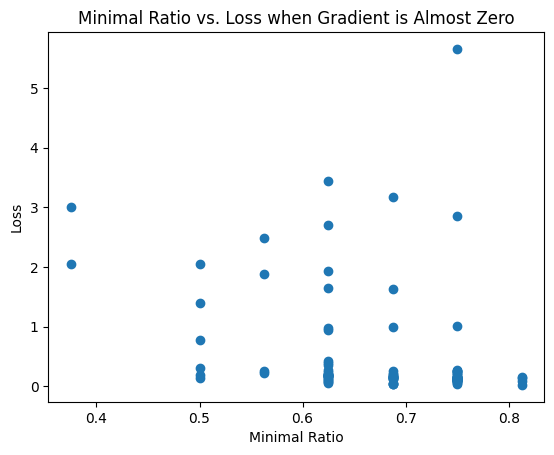

In [41]:
# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

# Compute the gradient norm
def compute_gradient_norm(model):
    total_norm = 0
    for param in model.parameters():
        if param.grad is not None:
            total_norm += param.grad.norm(2).item() ** 2
    return total_norm ** 0.5

# Compute the Hessian and its eigenvalues
def compute_hessian_eigenvalues(model, loss_fn, inputs, targets):
    outputs = model(inputs)
    loss = loss_fn(outputs, targets)
    
    # Compute the gradient of the loss with respect to the model parameters
    grads = torch.autograd.grad(loss, model.parameters(), create_graph=True)
    flat_grads = torch.cat([grad.view(-1) for grad in grads])
    
    # Compute the Hessian matrix
    hessian = []
    for grad in flat_grads:
        hessian_row = torch.autograd.grad(grad, model.parameters(), retain_graph=True)
        hessian.append(torch.cat([h.view(-1) for h in hessian_row]))
    hessian = torch.stack(hessian)
    
    # Compute the eigenvalues of the Hessian
    eigenvalues = torch.linalg.eigvals(hessian)
    return eigenvalues

# Training the network and minimizing gradient norm
def train_model(model, inputs, targets, original_loss_fn, optimizer, num_epochs=100):
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = original_loss_fn(outputs, targets)
        loss.backward()
        
        optimizer.step()
        
    return loss.item()

# Define the main function to run the experiment 100 times and collect data
def main():
    input_size = 1
    hidden_size = 5
    output_size = 1
    num_epochs = 100
    learning_rate = 0.01

    # Generate some sample data
    inputs = torch.randn(100, 1)
    targets = 3 * inputs + torch.randn(100, 1) * 0.1

    minimal_ratios = []
    losses = []

    for trial in range(100):
        model = SimpleNN(input_size, hidden_size, output_size)
        optimizer = optim.SGD(model.parameters(), lr=learning_rate)
        loss_fn = nn.MSELoss()

        # Train with original loss function
        final_loss = train_model(model, inputs, targets, loss_fn, optimizer)

        # Change the objective to minimize gradient norm
        for param in model.parameters():
            param.requires_grad = True
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = loss_fn(outputs, targets)
        loss.backward()

        grad_norm = compute_gradient_norm(model)

        # Calculate Hessian eigenvalues
        eigenvalues = compute_hessian_eigenvalues(model, loss_fn, inputs, targets)
        
        # Calculate minimal ratio (proportion of eigenvalues > 0)
        minimal_ratio = (eigenvalues.real > 0).sum().item() / eigenvalues.numel()
        minimal_ratios.append(minimal_ratio)
        losses.append(final_loss)

        # print(f"Trial {trial + 1}/100: Loss = {final_loss:.4f}, Minimal Ratio = {minimal_ratio:.4f}")

    # Plot the figure of minimal ratio vs. loss
    plt.scatter(minimal_ratios, losses)
    plt.xlabel('Minimal Ratio')
    plt.ylabel('Loss')
    plt.title('Minimal Ratio vs. Loss when Gradient is Almost Zero')
    plt.show()

if __name__ == "__main__":
    main()

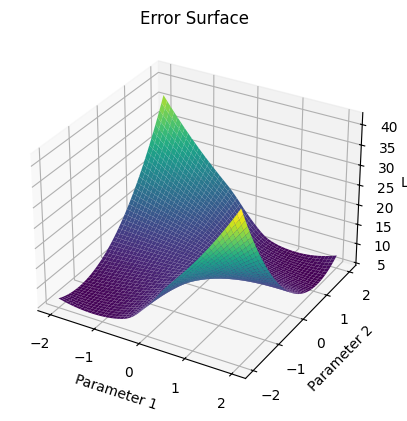

In [42]:
# Define a neural network
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

# Function to compute the loss for given parameter values
def compute_loss_for_params(model, inputs, targets, param1_values, param2_values):
    losses = np.zeros((len(param1_values), len(param2_values)))
    
    for i, p1 in enumerate(param1_values):
        for j, p2 in enumerate(param2_values):
            with torch.no_grad():
                # Update the model parameters
                model.fc1.weight.data[0, 0] = p1
                model.fc2.weight.data[0, 0] = p2
                
                outputs = model(inputs)
                loss = nn.MSELoss()(outputs, targets)
                losses[i, j] = loss.item()
    
    return losses

# Define the main function to plot the error surface
def main():
    input_size = 1
    hidden_size = 5
    output_size = 1

    # Generate some sample data
    inputs = torch.randn(100, 1)
    targets = 3 * inputs + torch.randn(100, 1) * 0.1

    # Initialize the model
    model = SimpleNN(input_size, hidden_size, output_size)
    
    # Define the range of parameter values to explore
    param1_values = np.linspace(-2, 2, 50)
    param2_values = np.linspace(-2, 2, 50)
    
    # Compute the loss over the grid
    losses = compute_loss_for_params(model, inputs, targets, param1_values, param2_values)
    
    # Plot the error surface
    param1_grid, param2_grid = np.meshgrid(param1_values, param2_values)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(param1_grid, param2_grid, losses.T, cmap='viridis')

    ax.set_xlabel('Parameter 1')
    ax.set_ylabel('Parameter 2')
    ax.set_zlabel('Loss')
    ax.set_title('Error Surface')

    plt.show()

if __name__ == "__main__":
    main()

# HW1-3: Generalization

## Can network fit random labels?

Epoch 1/10, Train Loss: 2.3039, Test Loss: 2.3022, Accuracy: 10.83%
Epoch 2/10, Train Loss: 2.3031, Test Loss: 2.3025, Accuracy: 9.84%
Epoch 3/10, Train Loss: 2.3028, Test Loss: 2.3029, Accuracy: 8.19%
Epoch 4/10, Train Loss: 2.3028, Test Loss: 2.3034, Accuracy: 9.18%
Epoch 5/10, Train Loss: 2.3028, Test Loss: 2.3026, Accuracy: 10.46%
Epoch 6/10, Train Loss: 2.3028, Test Loss: 2.3023, Accuracy: 9.44%
Epoch 7/10, Train Loss: 2.3028, Test Loss: 2.3028, Accuracy: 10.09%
Epoch 8/10, Train Loss: 2.3027, Test Loss: 2.3025, Accuracy: 9.80%
Epoch 9/10, Train Loss: 2.3026, Test Loss: 2.3032, Accuracy: 9.80%
Epoch 10/10, Train Loss: 2.3027, Test Loss: 2.3031, Accuracy: 9.47%


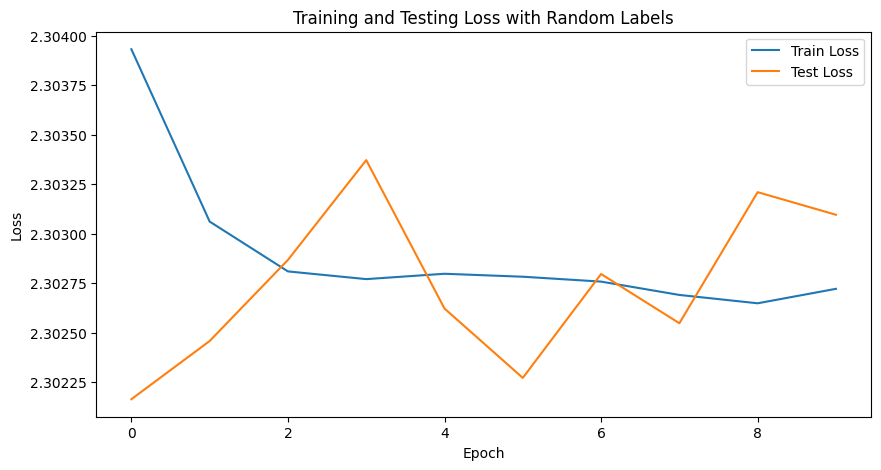

In [43]:
# Define a neural network model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load MNIST data
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Create random labels for the training set
def generate_random_labels(num_samples):
    return torch.randint(0, 10, (num_samples,))

# Initialize the model, loss function, and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training and testing functions
def train(model, train_loader, optimizer, criterion, random_labels=False):
    model.train()
    running_loss = 0.0
    for images, _ in train_loader:
        labels = generate_random_labels(images.size(0)) if random_labels else _

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
    
    epoch_loss = running_loss / len(train_loader.dataset)
    return epoch_loss

def test(model, test_loader, criterion):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * images.size(0)

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / len(test_loader.dataset)
    accuracy = 100 * correct / total
    return epoch_loss, accuracy

# Training and testing with random labels
num_epochs = 10
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    train_loss = train(model, train_loader, optimizer, criterion, random_labels=True)
    test_loss, accuracy = test(model, test_loader, criterion)
    
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%')

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(range(num_epochs), train_losses, label='Train Loss')
plt.plot(range(num_epochs), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss with Random Labels')
plt.legend()
plt.show()

## Number of parameters v.s. Generalization

In [44]:
# Define a function to create models with varying parameter sizes
def create_model(num_layers, hidden_units):
    layers = []
    input_size = 28 * 28  # MNIST images are 28x28 pixels
    output_size = 10  # Number of MNIST classes
    
    # Input layer
    layers.append(nn.Linear(input_size, hidden_units))
    layers.append(nn.ReLU())
    
    # Hidden layers
    for _ in range(num_layers - 1):
        layers.append(nn.Linear(hidden_units, hidden_units))
        layers.append(nn.ReLU())
    
    # Output layer
    layers.append(nn.Linear(hidden_units, output_size))
    
    return nn.Sequential(*layers)

# Training function
def train_model(model, train_loader, criterion, optimizer, num_epochs=5):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images.view(-1, 28 * 28))
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        avg_loss = running_loss / len(train_loader)
        accuracy = 100 * correct / total
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")
    return avg_loss, accuracy

# Evaluation function
def evaluate_model(model, test_loader, criterion):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images.view(-1, 28 * 28))
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    avg_loss = running_loss / len(test_loader)
    accuracy = 100 * correct / total
    return avg_loss, accuracy

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Parameters
num_layers_list = [1]  # Number of hidden layers
hidden_units_list = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100]  # Number of hidden units in each layer

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []
num_parameters = []

# Train and evaluate models with different configurations
for num_layers in num_layers_list:
    for hidden_units in hidden_units_list:
        model = create_model(num_layers, hidden_units)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        
        print(f"\nTraining model with {num_layers} layer and {hidden_units} hidden units per layer")
        train_loss, train_accuracy = train_model(model, train_loader, criterion, optimizer, num_epochs=5)
        test_loss, test_accuracy = evaluate_model(model, test_loader, criterion)
        
        num_params = sum(p.numel() for p in model.parameters())
        num_parameters.append(num_params)
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)


Training model with 1 layer and 100 hidden units per layer
Epoch [1/5], Loss: 0.4117, Accuracy: 88.12%
Epoch [2/5], Loss: 0.2283, Accuracy: 93.35%
Epoch [3/5], Loss: 0.1675, Accuracy: 95.10%
Epoch [4/5], Loss: 0.1329, Accuracy: 96.09%
Epoch [5/5], Loss: 0.1147, Accuracy: 96.57%

Training model with 1 layer and 200 hidden units per layer
Epoch [1/5], Loss: 0.3632, Accuracy: 89.37%
Epoch [2/5], Loss: 0.1811, Accuracy: 94.64%
Epoch [3/5], Loss: 0.1314, Accuracy: 96.06%
Epoch [4/5], Loss: 0.1051, Accuracy: 96.78%
Epoch [5/5], Loss: 0.0880, Accuracy: 97.27%

Training model with 1 layer and 300 hidden units per layer
Epoch [1/5], Loss: 0.3411, Accuracy: 89.89%
Epoch [2/5], Loss: 0.1595, Accuracy: 95.23%
Epoch [3/5], Loss: 0.1123, Accuracy: 96.61%
Epoch [4/5], Loss: 0.0934, Accuracy: 97.13%
Epoch [5/5], Loss: 0.0790, Accuracy: 97.55%

Training model with 1 layer and 400 hidden units per layer
Epoch [1/5], Loss: 0.3262, Accuracy: 90.36%
Epoch [2/5], Loss: 0.1510, Accuracy: 95.46%
Epoch [3/5],

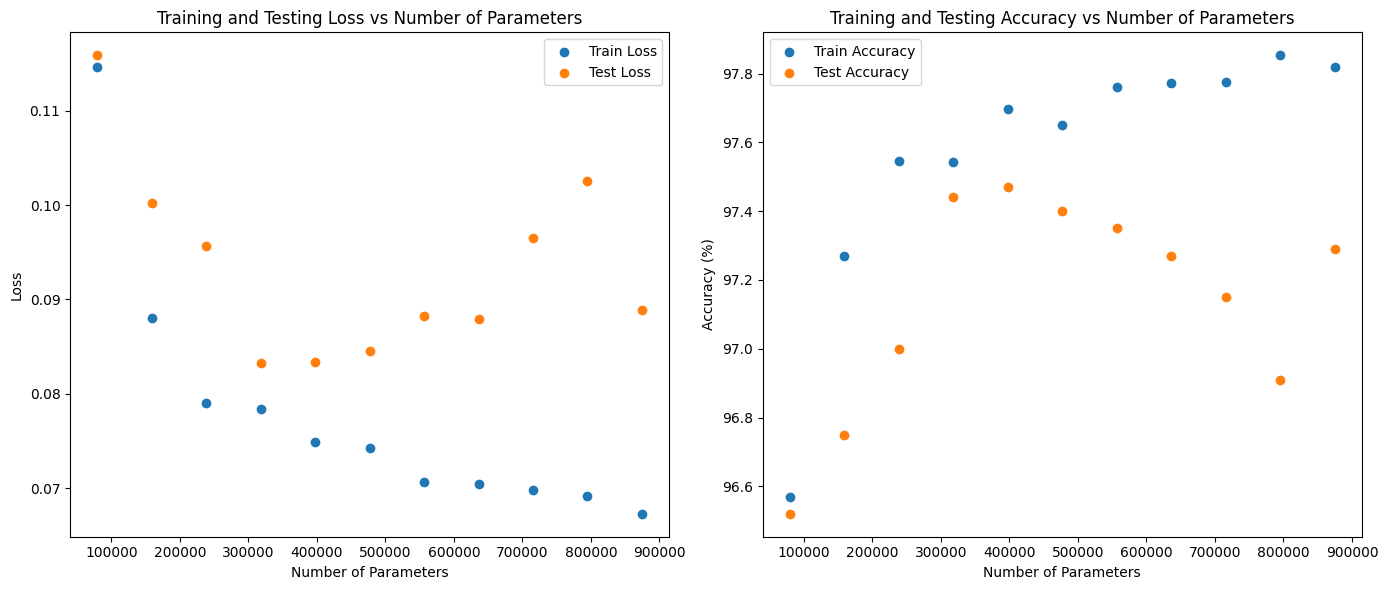

In [45]:
plt.figure(figsize=(14, 6))

# Loss plots
plt.subplot(1, 2, 1)
plt.scatter(num_parameters, train_losses, label='Train Loss', marker='o')
plt.scatter(num_parameters, test_losses, label='Test Loss', marker='o')
plt.xlabel('Number of Parameters')
plt.ylabel('Loss')
plt.title('Training and Testing Loss vs Number of Parameters')
plt.legend()

# Accuracy plots
plt.subplot(1, 2, 2)
plt.scatter(num_parameters, train_accuracies, label='Train Accuracy', marker='o')
plt.scatter(num_parameters, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Number of Parameters')
plt.ylabel('Accuracy (%)')
plt.title('Training and Testing Accuracy vs Number of Parameters')
plt.legend()

plt.tight_layout()
plt.show()

## Flatness v.s. Generalization - part1
## Visualize the line between two trained models

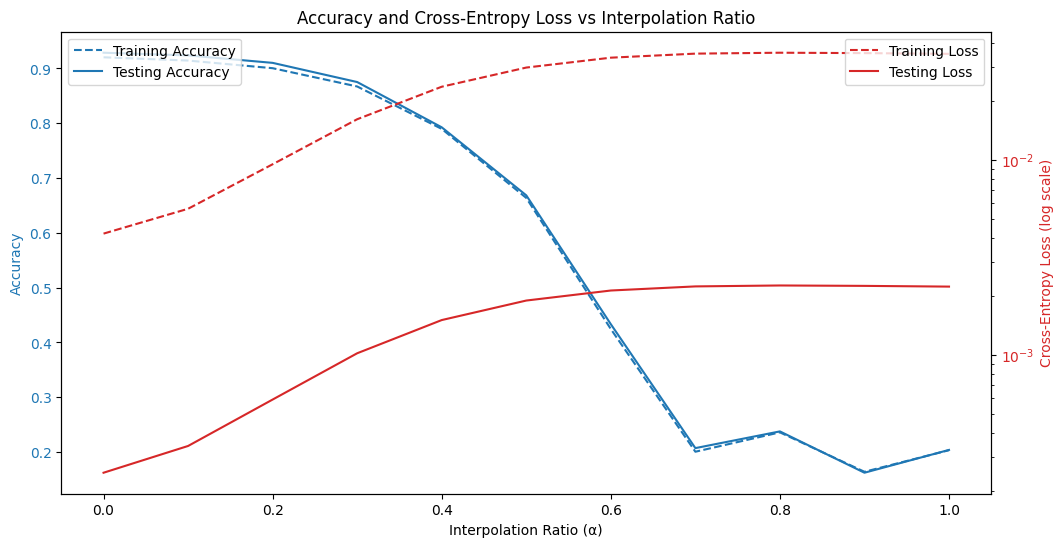

In [46]:
# Define a CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Training function
def train_model(batch_size, model, optimizer, criterion, train_loader):
    model.train()
    for epoch in range(1):  # Train for 1 epoch
        for batch_idx, (data, target) in enumerate(train_loader):
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

# Evaluate function
def evaluate_model(model, data_loader, criterion):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in data_loader:
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    return test_loss / len(data_loader.dataset), correct / len(data_loader.dataset)

# Interpolate models
def interpolate_models(model1, model2, alpha):
    model_interpolated = SimpleCNN()
    state_dict1 = model1.state_dict()
    state_dict2 = model2.state_dict()
    state_dict_interpolated = {}
    for key in state_dict1:
        state_dict_interpolated[key] = (1 - alpha) * state_dict1[key] + alpha * state_dict2[key]
    model_interpolated.load_state_dict(state_dict_interpolated)
    return model_interpolated

# Load MNIST data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST('.', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('.', train=False, download=True, transform=transform)

# Different batch sizes
batch_sizes = [64, 1024]
train_loaders = [DataLoader(train_dataset, batch_size=bs, shuffle=True) for bs in batch_sizes]
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

# Train models
models = [SimpleCNN(), SimpleCNN()]
optimizers = [optim.SGD(model.parameters(), lr=0.01) for model in models]
criterion = nn.CrossEntropyLoss()

for i, (model, optimizer) in enumerate(zip(models, optimizers)):
    train_model(batch_sizes[i], model, optimizer, criterion, train_loaders[i])

# Evaluate models
train_losses, test_losses = [], []
train_accuracies, test_accuracies = [], []
alpha_values = np.linspace(0, 1, 11)

for alpha in alpha_values:
    model_interpolated = interpolate_models(models[0], models[1], alpha)
    train_loss, train_accuracy = evaluate_model(model_interpolated, train_loaders[0], criterion)
    test_loss, test_accuracy = evaluate_model(model_interpolated, test_loader, criterion)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot results
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot training and testing accuracy
ax1.set_xlabel('Interpolation Ratio (α)')
ax1.set_ylabel('Accuracy', color='tab:blue')
ax1.plot(alpha_values, train_accuracies, color='tab:blue', linestyle='--', label='Training Accuracy')
ax1.plot(alpha_values, test_accuracies, color='tab:blue', label='Testing Accuracy')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for the loss
ax2 = ax1.twinx()
ax2.set_ylabel('Cross-Entropy Loss (log scale)', color='tab:red')
ax2.plot(alpha_values, train_losses, color='tab:red', linestyle='--', label='Training Loss')
ax2.plot(alpha_values, test_losses, color='tab:red', label='Testing Loss')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_yscale('log')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Accuracy and Cross-Entropy Loss vs Interpolation Ratio')
plt.show()

## Part 2 Sensitivity

Training with batch size: 16
Training with batch size: 32
Training with batch size: 64
Training with batch size: 128
Training with batch size: 256


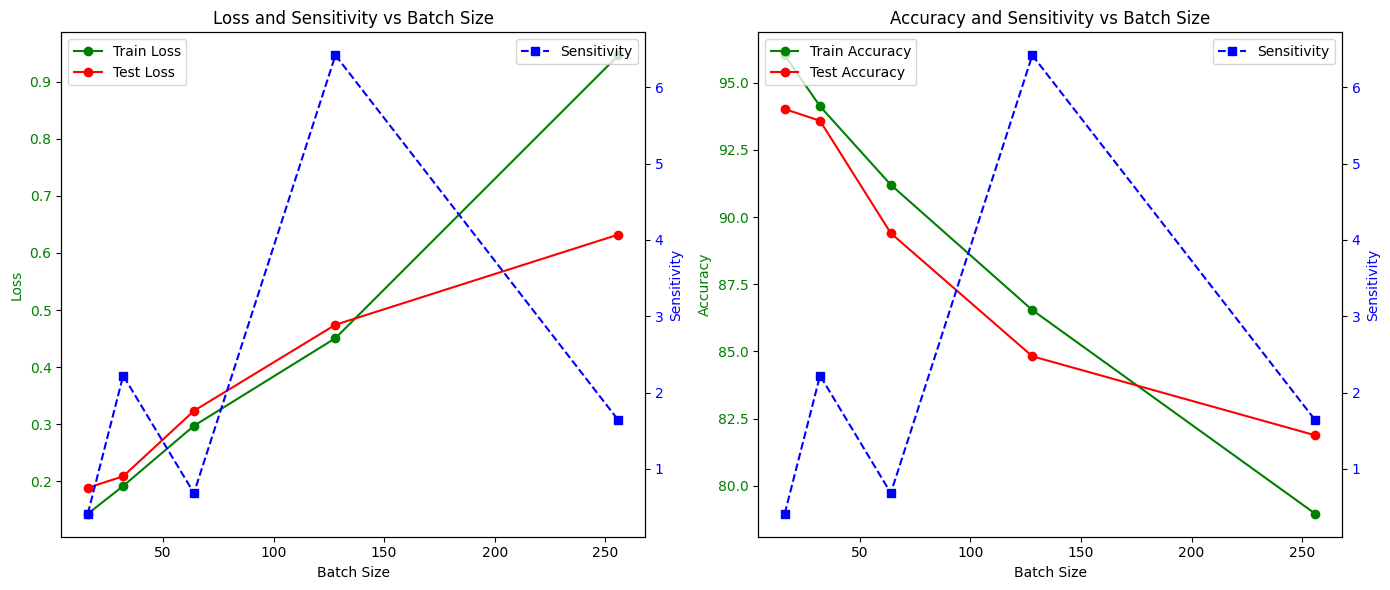

In [64]:
# Define a model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)  # Reduced filters
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1) # Reduced filters
        self.fc1 = nn.Linear(32 * 7 * 7, 64)  # Reduced neurons
        self.fc2 = nn.Linear(64, 10)
        self.pool = nn.MaxPool2d(2, 2)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.pool(self.conv1(x)))
        x = self.relu(self.pool(self.conv2(x)))
        x = x.view(-1, 32 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Hyperparameters and configurations
batch_sizes = [16, 32, 64, 128, 256]
epochs = 2 
learning_rate = 0.001
subset_size = 5000  

# Data preparation
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)


train_dataset = Subset(train_dataset, range(subset_size))
test_dataset = Subset(test_dataset, range(subset_size))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.CrossEntropyLoss()

# Helper function to calculate sensitivity (gradient norm)
def compute_sensitivity(model):
    total_norm = 0
    for p in model.parameters():
        if p.grad is not None:
            param_norm = p.grad.data.norm(2)
            total_norm += param_norm.item() ** 2
    return total_norm ** 0.5

# Training and evaluation function
def train_and_evaluate(batch_size):
    # Data loader
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Model initialization
    model = SimpleCNN().to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Lists to store metrics
    train_loss, test_loss = [], []
    train_acc, test_acc = [], []
    sensitivities = []

    for epoch in range(epochs):
        model.train()
        correct, total = 0, 0
        running_loss = 0.0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        # Record training loss and accuracy
        train_loss.append(running_loss / len(train_loader))
        train_acc.append(100 * correct / total)

        # Compute sensitivity (gradient norm)
        sensitivity = compute_sensitivity(model)
        sensitivities.append(sensitivity)

        # Testing the model
        model.eval()
        correct, total = 0, 0
        running_loss = 0.0

        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                running_loss += loss.item()

                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        # Record test loss and accuracy
        test_loss.append(running_loss / len(test_loader))
        test_acc.append(100 * correct / total)

    return train_loss, test_loss, train_acc, test_acc, sensitivities

# Main function to train all models with different batch sizes
def main():
    all_train_loss, all_test_loss = [], []
    all_train_acc, all_test_acc = [], []
    all_sensitivities = []

    for batch_size in batch_sizes:
        print(f"Training with batch size: {batch_size}")
        train_loss, test_loss, train_acc, test_acc, sensitivities = train_and_evaluate(batch_size)
        all_train_loss.append(train_loss[-1])  # Record final epoch loss
        all_test_loss.append(test_loss[-1])
        all_train_acc.append(train_acc[-1])  # Record final epoch accuracy
        all_test_acc.append(test_acc[-1])
        all_sensitivities.append(sensitivities[-1])  # Record final sensitivity

    # Plotting results
    plot_results(batch_sizes, all_train_loss, all_test_loss, all_train_acc, all_test_acc, all_sensitivities)

# Helper function to plot the results with dual y-axes
def plot_results(batch_sizes, train_loss, test_loss, train_acc, test_acc, sensitivities):
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    # Plot loss and sensitivity with dual y-axes
    ax1 = axs[0]
    ax2 = ax1.twinx()  # Create a second y-axis

    ax1.plot(batch_sizes, train_loss, 'g-o', label='Train Loss')
    ax1.plot(batch_sizes, test_loss, 'r-o', label='Test Loss')
    ax2.plot(batch_sizes, sensitivities, 'b--s', label='Sensitivity') 

    ax1.set_xlabel('Batch Size')
    ax1.set_ylabel('Loss', color='g')
    ax2.set_ylabel('Sensitivity', color='b')

    ax1.tick_params(axis='y', labelcolor='g')
    ax2.tick_params(axis='y', labelcolor='b')

    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    ax1.set_title('Loss and Sensitivity vs Batch Size')

    # Plot accuracy and sensitivity with dual y-axes
    ax3 = axs[1]
    ax4 = ax3.twinx()  # Create a second y-axis

    ax3.plot(batch_sizes, train_acc, 'g-o', label='Train Accuracy')
    ax3.plot(batch_sizes, test_acc, 'r-o', label='Test Accuracy')
    ax4.plot(batch_sizes, sensitivities, 'b--s', label='Sensitivity')  # Updated linestyle

    ax3.set_xlabel('Batch Size')
    ax3.set_ylabel('Accuracy', color='g')
    ax4.set_ylabel('Sensitivity', color='b')

    ax3.tick_params(axis='y', labelcolor='g')
    ax4.tick_params(axis='y', labelcolor='b')

    ax3.legend(loc='upper left')
    ax4.legend(loc='upper right')
    ax3.set_title('Accuracy and Sensitivity vs Batch Size')

    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    main()